<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Use natural language to create charts and graphs**


Estimated time needed: **30** minutes


## Overview


Imagine you are a data analyst or a data scientist of a marketing team at an e-commerce company. The company needs to understand customer purchasing behaviors over the last year to tailor their upcoming holiday campaigns. Traditionally, this would involve complex SQL queries, data wrangling in Python, and perhaps building visual dashboards to interpret the results including analyzing spreadsheets, creating charts, and maybe even some statistical analysis—tasks that require considerable time and expertise.

With the integration of Langchain and LLMs, you can simply ask, "Show me a visualization of monthly sales trends by product category," or "Generate a heatmap of customer activity by region." The system would use the `create_pandas_dataframe_agent` to process the CSV data, and then dynamically generate visualizations such as line graphs, bar charts, or heatmaps in response to these queries. This not only speeds up the data analysis process but also allows team members who may not be tech-savvy to engage directly with the data and make informed decisions quickly. This approach fosters a more collaborative environment and ensures that strategic decisions are backed by real-time data insights, visually represented for easy comprehension.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/V_7__WU_jHJ1lOpTeSLxTQ/chat%20with%20data.png" width="50%" alt="indexing"/>


In this lab, you will learn how to seamlessly integrate data visualization into your conversational data analysis using Langchain and LLMs. Starting with CSV file data, you will use the `create_pandas_dataframe_agent` to build an interactive agent that not only understands and responds to your queries but also translates data responses into visual formats. You will explore how to dynamically generate charts, graphs, and heatmaps directly in response to natural language questions. This capability will enable you to visualize trends, compare figures, and spot patterns immediately, making your data analysis workflow both efficient and visually engaging. By the end of this project, you will have the skills to create a data conversational agent that acts as both analyst and visualizer, bringing data to life through dialogue.

In this lab we are going to use Llama 3 LLM hosted on the IBM watsonx.ai platform.


---------


## Objectives


After completing the project, you should be able to:

- **Use Langchain with large language models**: Understand and apply the Langchain framework in conjunction with LLMs to interact with and analyze data stored in CSV files through natural language processing.
- **Create conversational data agents**: Build a conversational agent that can understand and respond to natural language queries about data, enabling users to ask questions directly and receive immediate answers.
- **Implement data visualization through dialogue**: Integrate data visualization tools within your conversational agent, allowing you to request and generate visual data representations such as graphs, charts, and heatmaps dynamically based on your queries.
- **Enhance decision-making process**: Develop the capability to derive actionable insights from data via interactive dialogues and visual outputs, thereby improving the decision-making process and making data analysis accessible to non-technical stakeholders.


----


For this lab, we will be using the following libraries:

*   [`ibm-watson-ai`](https://ibm.github.io/watson-machine-learning-sdk/index.html) for using LLMs from IBM's watsonx.ai.
*   [`LangChain`, `langchain-ibm`, `langchain-experimental`](https://www.langchain.com/) for using its agent function to interact with data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.


### Installing required libraries

The following required libraries are __not__ preinstalled in the Skills Network Labs environment. __You must run the following cell__ to install them:

**Note:** We are pinning the version here to specify the version. It's recommended that you do this as well. Even if the library is updated in the future, the installed library could still support this lab work.

This might take approximately 1-2 minutes. 

As we use `%%capture` to capture the installation, you won't see the output process. But after the installation completes, you will see a number beside the cell.


In [1]:
%%capture
!pip install ibm-watsonx-ai=="0.2.6"
!pip install --user langchain=="0.1.16" 
!pip install --user langchain-ibm=="0.1.4"
!pip install --user langchain-experimental=="0.0.57"
!pip install matplotlib=="3.8.4"
!pip install seaborn=="0.13.2"

In [2]:
!pip list

Package                         Version
------------------------------- --------------
aiohappyeyeballs                2.4.4
aiohttp                         3.11.11
aiosignal                       1.3.2
alembic                         1.14.0
annotated-types                 0.7.0
anyio                           4.8.0
archspec                        0.2.3
argon2-cffi                     23.1.0
argon2-cffi-bindings            21.2.0
arrow                           1.3.0
astroid                         3.3.8
asttokens                       3.0.0
async_generator                 1.10
async-lru                       2.0.4
attrs                           24.3.0
autopep8                        2.0.4
babel                           2.16.0
beautifulsoup4                  4.12.3
bleach                          6.2.0
blinker                         1.9.0
boltons                         24.0.0
Brotli                          1.1.0
cached-property                 1.5.2
certifi                        

### Importing required libraries

_We recommend you import all required libraries in one place (here):_


In [3]:
# We use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

from ibm_watsonx_ai.foundation_models import Model
from ibm_watsonx_ai.metanames import GenTextParamsMetaNames as GenParams
from ibm_watson_machine_learning.foundation_models.extensions.langchain import WatsonxLLM

from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

import matplotlib.pyplot as plt
import pandas as pd

## Data set


In this lab, you will work on the Student Alcohol Consumption data set `student-mat.csv` by UCI Machine Learning as an example. For more information, see [Kaggle](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption). It is based on data collected from two secondary schools in Portugal. The students included in the survey were in mathematics and Portuguese courses.


The data set we are using is for the mathematics course. The number of mathematics students involved in the collection was 395. The data collected in locations such as Gabriel Pereira and Mousinho da Silveira includes several pertinence values. Examples of such data are records of demographic information, grades, and alcohol consumption.


| Field     | Description                                                                 |
|-----------|-----------------------------------------------------------------------------|
| school    | GP/MS for the student's school                                              |
| sex       | M/F for gender                                                              |
| age       | 15-22 for the student's age                                                 |
| address   | U/R for urban or rural, respectively                                        |
| famsize   | LE3/GT3 for less than or greater than three family members                  |
| Pstatus   | T/A for living together or apart from parents, respectively                 |
| Medu      | 0 (none) / 1 (primary-4th grade) / 2 (5th - 9th grade) / 3 (secondary) / 4 (higher) for mother's education |
| Fedu      | 0 (none) / 1 (primary-4th grade) / 2 (5th - 9th grade) / 3 (secondary) / 4 (higher) for father's education |
| Mjob      | 'teacher,' 'health' care related, civil 'services,' 'at_home' or 'other' for the student's mother's job |
| Fjob      | 'teacher,' 'health' care related, civil 'services,' 'at_home' or 'other' for the student's father's job |
| reason    | reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') |
| guardian  | mother/father/other as the student's guardian                               |
| traveltime| 1 (<15mins) / 2 (15 - 30 mins) / 3 (30 mins - 1 hr) / 4 (>1hr) for a time from home to school |
| studytime | 1 (<2hrs) / 2 (2 - 5hrs) / 3 (5 - 10hrs) / 4 (>10hrs) for weekly study time |
| failures  | 1-3/4 for the number of class failures (if more than three, then record 4)  |
| schoolsup | yes/no for extra educational support                                        |
| famsup    | yes/no for family educational support                                       |
| paid      | yes/no for extra paid classes for Math or Portuguese                        |
| activities| yes/no for extra-curricular activities                                      |
| nursery   | yes/no for whether attended nursery school                                  |
| higher    | yes/no for the desire to continue studies                                   |
| internet  | yes/no for internet access at home                                          |
| romantic  | yes/no for relationship status                                              |
| famrel    | 1-5 scale on quality of family relationships                                |
| freetime  | 1-5 scale on how much free time after school             |
| goout     | 1-5 scale on how much student goes out with friends      |
| Dalc      | 1-5 scale on how much alcohol consumed on weekdays       |
| Walc      | 1-5 scale on how much alcohol consumed on the weekend    |
| health    | 1-5 scale on health condition                            |
| absences  | 0-93 number of absences from school                      |
| G1        | 0-20 for the first-period grade                          |
| G2        | 0-20 for the second-period grade                         |
| G3        | 0-20 for the final grade                                 |


### Load the data set


Execute the code in the following cell to load your dataset. This code reads the CSV file into a pandas DataFrame, making the data accessible for processing in Python.


In [4]:
df = pd.read_csv(
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/ZNoKMJ9rssJn-QbJ49kOzA/student-mat.csv"
)

Let's examine the first five rows of the dataset to get a glimpse of the data structure and its contents.


In [5]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


We can also review the detailed information for each column in the dataset, focusing on the presence of null values and the specific data types of each column.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Load LLM


Execute the code in the cell below to load the llama-3-70b LLM model from watsonx.ai. 

Additionally, we will configure the LLM to interact with data by integrating it with Langchain's `create_pandas_dataframe_agent`.


In [7]:
# Create a dictionary to store credential information
credentials = {
    "url"    : "https://us-south.ml.cloud.ibm.com"
}

# Indicate the model we would like to initialize. In this case, Llama 3 70B.
model_id    = 'meta-llama/llama-3-70b-instruct'

# Initialize some watsonx.ai model parameters
params = {
        GenParams.MAX_NEW_TOKENS: 256, # The maximum number of tokens that the model can generate in a single run.
        GenParams.TEMPERATURE: 0,   # A parameter that controls the randomness of the token generation. A lower value makes the generation more deterministic, while a higher value introduces more randomness.
    }
project_id  = "skills-network" # <--- NOTE: specify "skills-network" as your project_id
space_id    = None
verify      = False

# Launch a watsonx.ai model
model = Model(
    model_id=model_id, 
    credentials=credentials, 
    params=params, 
    project_id=project_id, 
    space_id=space_id, 
    verify=verify
)

# Integrate the watsonx.ai model with the langchain framework
llm = WatsonxLLM(model = model)

agent = create_pandas_dataframe_agent(
    llm,
    df,
    verbose=False,
    return_intermediate_steps=True  # set return_intermediate_steps=True so that model could return code that it comes up with to generate the chart
)

### Interact with your data


Let's start with a simple interaction.

Ask LLM how many rows of data are in the CSV file.


In [8]:
response = agent.invoke("how many rows of data are in this file?")

In [9]:
response['output']

'395'

From the output above, the model reports that there are 395 rows of data in the file.


Let's verify this count using Python code to ensure accuracy.


In [10]:
len(df)

395

The row count matches and is correct! 


Curious about the code the LLM generated and used to create this result?

Run the code in the cell below to reveal the underlying commands.


In [11]:
response['intermediate_steps'][0][0].tool_input.replace('; ', '\n')

'len(df)'

Surprisingly, the LLM uses the same code as we do.


Also, we could let LLM return some data that we are looking for based on the CSV file.


In [12]:
response = agent.invoke("Give me all the data where student's age is over 18 years old.")

In [13]:
print(response)

{'input': "Give me all the data where student's age is over 18 years old.", 'output': "The final answer is the dataframe with all the data where student's age is over 18 years old.", 'intermediate_steps': [(AgentAction(tool='python_repl_ast', tool_input="df[df['age'] > 18]", log="Thought: I need to filter the dataframe to get the rows where the age is greater than 18.\nAction: python_repl_ast\nAction Input: df[df['age'] > 18]"),     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
127     GP   F   19       U     GT3       T     0     1   at_home     other   
153     GP   M   19       U     GT3       T     3     2  services   at_home   
210     GP   F   19       U     GT3       T     3     3     other     other   
247     GP   M   22       U     GT3       T     3     1  services  services   
257     GP   M   19       U     LE3       A     4     3  services   at_home   
270     GP   F   19       U     GT3       T     3     3     other  services   
296     GP   F

Let's get the code LLM used for charting this plot.


In [14]:
response['intermediate_steps'][0][0].tool_input.replace('; ', '\n')

"df[df['age'] > 18]"

### Plot your data with natural language


#### Task 1
Generating a first visual on the data set to know the total number of male and female students in the data set.

We just tell the agent that "Plot the gender count with bars."


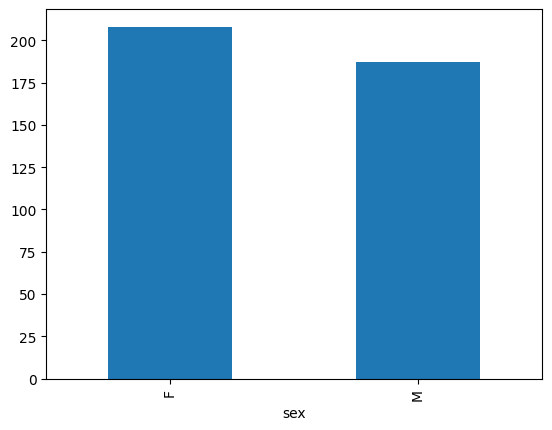

In [15]:
response = agent.invoke("Plot the gender count with bars.")

Let's see what code the LLM generated for ploting this chart.


In [16]:
print(response['intermediate_steps'][0][0].tool_input.replace('; ', '\n'))

df['sex'].value_counts().plot(kind='bar')


#### Task 2

Generating a pie chart for displaying the average value of weekend alcohol for each gender in the data set.

We will use the prompt "Generate a pie chart to display average value of Walc for each gender."

You may notice that the model generates two charts. The charts actually indicate the progressive improvement of the agent's code as it searches for the best way to answer to our prompt. It presents an improvement in the response to our query.


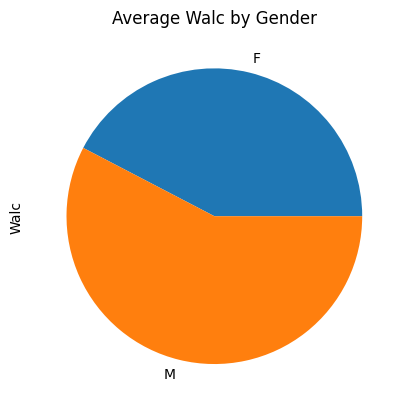

In [17]:
response = agent.invoke("Generate a pie chart to display average value of Walc for each Gender.")

Let's get the code LLM used for charting this plot.


In [18]:
print(response['intermediate_steps'][0][0].tool_input.replace('; ', '\n'))

import matplotlib.pyplot as plt
df.groupby('sex')['Walc'].mean().plot(kind='pie')


#### Task 3

We can explore the impact of free time on grades based on the data.


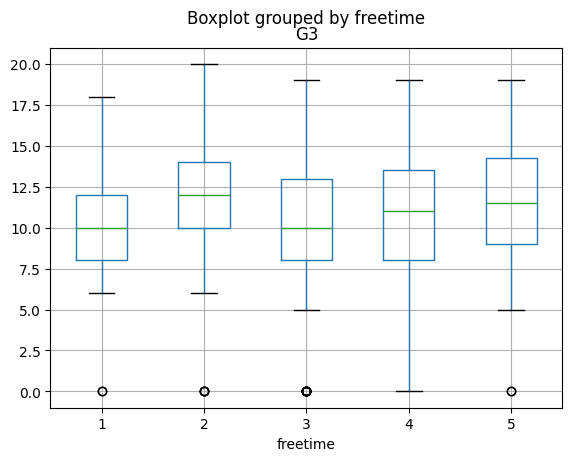

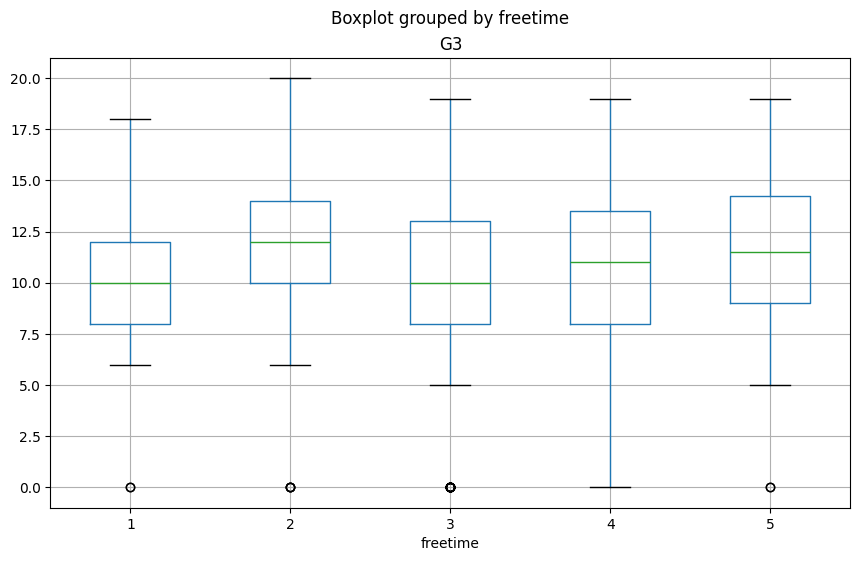

In [19]:
response = agent.invoke("Create box plots to analyze the relationship between 'freetime' (amount of free time) and 'G3' (final grade) across different levels of free time.")

Execute the code below to retrieve the Python script the LLM used for plotting.


In [20]:
print(response['intermediate_steps'][0][0].tool_input.replace('; ', '\n'))

import matplotlib.pyplot as plt
df.boxplot(column='G3', by='freetime')
plt.show()


#### Task 4

We can explore the effect of alcohol consumption on academic performance.


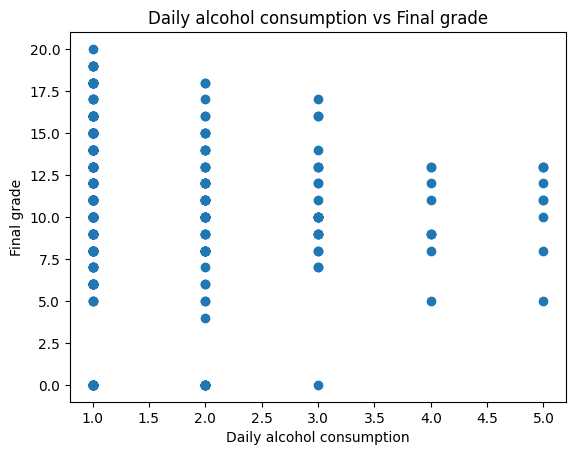

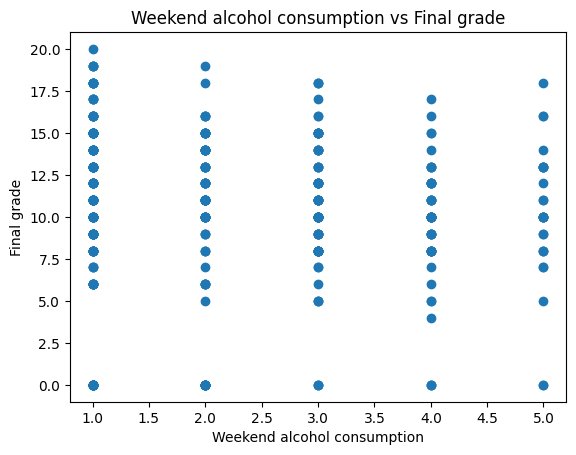

In [21]:
response = agent.invoke("Generate scatter plots to examine the correlation between 'Dalc' (daily alcohol consumption) and 'G3', and between 'Walc' (weekend alcohol consumption) and 'G3'.")

Execute the code below to retrieve the Python script the LLM used for plotting.


In [23]:
print(response['intermediate_steps'][0][0].tool_input.replace('; ', '\n'))

import matplotlib.pyplot as plt


# Exercises


### Exercise 1 - Relationship between parental education level and student grades


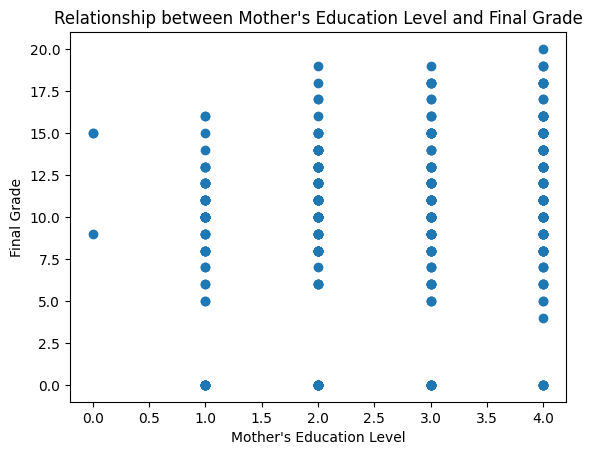

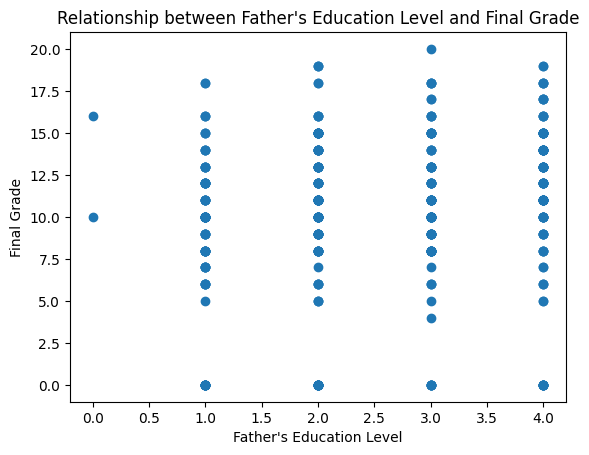

In [24]:
response = agent.invoke("Plot scatter plots to show the relationship between 'Medu' (mother's education level) and 'G3' (final grade), and between 'Fedu' (father's education level) and 'G3'.")

<details>
    <summary>Click here for Solution</summary>

```python

response = agent.invoke("Plot scatter plots to show the relationship between 'Medu' (mother's education level) and 'G3' (final grade), and between 'Fedu' (father's education level) and 'G3'.")

```

</details>


### Exercise 2 - Impact of internet access at home on grades


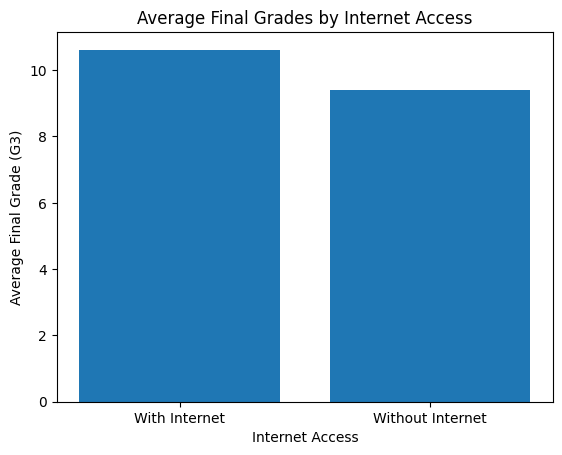

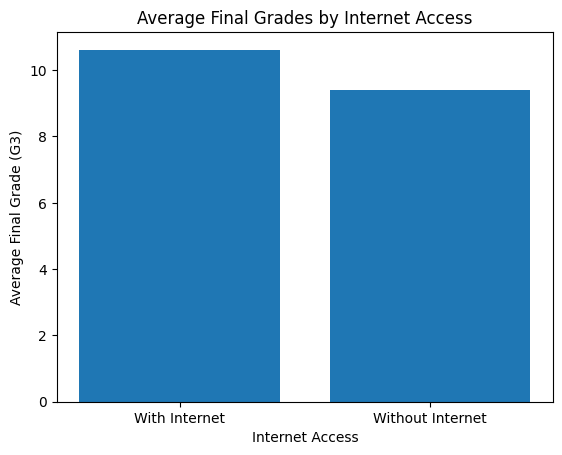

In [25]:
response = agent.invoke("Use bar plots to compare the average final grades ('G3') of students with internet access at home versus those without ('internet' column).")

<details>
    <summary>Click here for a solution</summary>
    
```python

response = agent.invoke("Use bar plots to compare the average final grades ('G3') of students with internet access at home versus those without ('internet' column).")

```

</details>


### Exercise 3 - Explore LLM's code


Can you find what code the model used to generate the plot for exploring the relationship between absences and academic performance?

You could run the corresponding code and from the response chain, you could see the code used from charting.


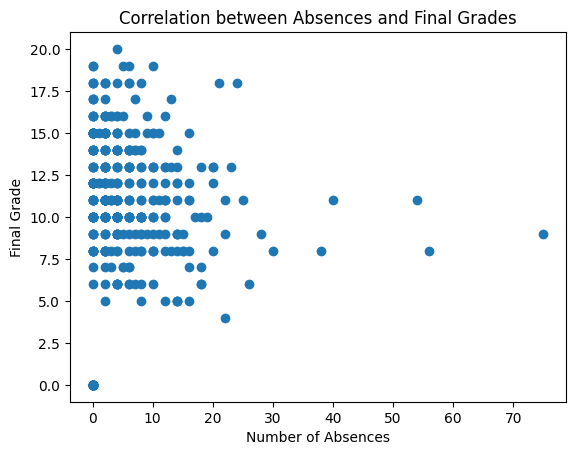

In [26]:
response = agent.invoke("Plot a scatter plot showing the correlation between the number of absences ('absences') and final grades ('G3') of students.")

In [27]:
for i in range(len(response['intermediate_steps'])):
    print(response['intermediate_steps'][i][0].tool_input.replace(';', '\n'))

import matplotlib.pyplot as plt
plt.scatter(df['absences'], df['G3'])
plt.xlabel('Number of Absences')
 plt.ylabel('Final Grade')
 plt.title('Correlation between Absences and Final Grades')
plt.show()


<details>
    <summary>Click here for a solution</summary>
    
```python

response = agent.invoke("Plot a scatter plot showing the correlation between the number of absences ('absences') and final grades ('G3') of students.")

for i in range(len(response['intermediate_steps'])):
    print(response['intermediate_steps'][i][0].tool_input.replace(';', '\n'))

```

</details>
